In [1]:
import pandas as pd
import numpy as np
import re

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('gurgaon_properties_cleaned_v1.csv')

In [3]:
df.shape

(3865, 17)

In [4]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3,3,3,study room,0.0,North-East,1 to 5 Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBaz...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F..."
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5,6,3+,Servant Room,2.0,NaN,5 to 10 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...",NaN,"['Maintenance Staff', 'Separate entry for serv..."
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4,3,3,servant room,8.0,NaN,0 to 1 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",NaN,"['Lift(s)', 'Maintenance Staff', 'Water Storag..."
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3,1,1.0,Others,3.0,East,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",[],"['Water Storage', 'Park', 'Visitor Parking']"
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,not available,5.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...","['6 Fan', '5 AC', '1 Chimney', '1 Modular Kitc...","['Centrally Air Conditioned', 'Water purifier'..."


# 1. AreaWithType: break it down into three features, such as: SuperBuiltUpArea, BuiltUpArea, carpetArea

In [6]:
df[['area', 'areaWithType']].head()

,area,areaWithType
0,2061.08,Super Built up area 2061(191.47 sq.m.)
1,2430.00,Plot area 270(225.75 sq.m.)
2,2800.41,Carpet area: 2800 (260.13 sq.m.)
3,550.00,Plot area 550(51.1 sq.m.)
4,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...


In [7]:
def get_super_built_up_area(x):
    pattern = re.compile(r"\bSuper Built up area (\d+)")
    match = re.findall(pattern, x)
    return match
    

In [8]:
def built_up_area(x):
    pattern = re.compile(r"\bBuilt Up area: (\d+)")
    match = re.findall(pattern, x)
    return match

In [9]:
def carpet_area(x):
    pattern = re.compile(r"\bCarpet area: (\d+)")
    match = re.findall(pattern, x)
    return match

In [10]:
df['SuperBuiltUpArea'] = df['areaWithType'].apply(
    lambda x : np.nan if pd.isna(x)
    else float(get_super_built_up_area(x)[0]) if len(get_super_built_up_area(x)) > 0
    else np.nan
)

In [11]:
df['builtUpArea'] = df['areaWithType'].apply(
    lambda x : np.nan if isinstance(x, float)
    else float(built_up_area(x)[0]) if len(built_up_area(x)) > 0
    else np.nan
)

In [12]:
df['carpetArea'] = df['areaWithType'].apply(
    lambda x : x if isinstance(x, float)
    else float(carpet_area(x)[0]) if len(carpet_area(x)) > 0
    else np.nan
)

In [13]:
pd.set_option('display.max_colwidth', 50)
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,SuperBuiltUpArea,builtUpArea,carpetArea
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3,3,3,study room,0.0,North-East,1 to 5 Year Old,"['Sapphire Mall', 'Omaxe City Centre', 'BigBaz...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",2061.0,NaN,NaN
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5,6,3+,Servant Room,2.0,NaN,5 to 10 Year Old,"['Dwarka sector 21 metro station', 'Pacific D2...",NaN,"['Maintenance Staff', 'Separate entry for serv...",NaN,NaN,NaN
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4,3,3,servant room,8.0,NaN,0 to 1 Year Old,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",NaN,"['Lift(s)', 'Maintenance Staff', 'Water Storag...",NaN,NaN,2800.0
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3,1,1.0,Others,3.0,East,1 to 5 Year Old,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",[],"['Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,NaN
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3,3,3,not available,5.0,South-East,1 to 5 Year Old,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...","['6 Fan', '5 AC', '1 Chimney', '1 Modular Kitc...","['Centrally Air Conditioned', 'Water purifier'...",1811.0,1711.0,1611.0


In [14]:
all_area = df[df.apply(lambda x: pd.isna(x['SuperBuiltUpArea']) == False and pd.isna(x['builtUpArea']) == False and pd.isna(x['carpetArea']) == False, axis=1)]

In [15]:
contains_plot = df[df['areaWithType'].apply(lambda x : False if isinstance(x, float)
                        else True if 'Plot' in x
                        else False
                           )]

In [16]:
df['SuperBuiltUpArea'].isnull().sum()

1944

In [17]:
df['builtUpArea'].isnull().sum()

2661

In [18]:
df['carpetArea'].isnull().sum()

1901

In [19]:
all_nan_area = df[df['SuperBuiltUpArea'].isnull() & df['builtUpArea'].isnull() & df['carpetArea'].isnull()]

In [20]:
all_nan_area['builtUpArea'] = all_nan_area['areaWithType'].apply(
    lambda x: x if pd.isna(x)
    else float(re.findall(re.compile(r"Plot area (\d+)"), x)[0])
)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_60487/1827844438.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_nan_area['builtUpArea'] = all_nan_area['areaWithType'].apply(


In [21]:
all_nan_area['builtUpArea'].isnull().sum()

0

In [22]:
def update_built_up_area(row):
    if pd.notna(row['area']) and pd.notna(row['builtUpArea']) and row['area'] > row['builtUpArea'] + 20:
        row['builtUpArea'] = row['builtUpArea'] * 9
    return row

all_nan_area = all_nan_area.apply(update_built_up_area, axis=1)

In [23]:
all_nan_area[['area', 'areaWithType', 'SuperBuiltUpArea', 'builtUpArea']]

,area,areaWithType,SuperBuiltUpArea,builtUpArea
1,2430.0,Plot area 270(225.75 sq.m.),NaN,2430.0
3,550.0,Plot area 550(51.1 sq.m.),NaN,550.0
12,2880.0,Plot area 320(267.56 sq.m.),NaN,2880.0
13,NaN,Plot area 670(560.21 sq.m.),NaN,670.0
22,963.0,Plot area 107(89.47 sq.m.),NaN,963.0
23,1450.1,Plot area 1450(134.71 sq.m.),NaN,1450.0
52,3762.0,Plot area 418(349.5 sq.m.),NaN,3762.0
60,1080.0,Plot area 120(100.34 sq.m.),NaN,1080.0
62,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.0
63,3600.0,Plot area 400(334.45 sq.m.),NaN,3600.0


In [24]:
df.update(all_nan_area)

In [25]:
df.isna().sum()

sector                 0
property_type          0
society                1
price                 39
price_per_sqft        39
area                  39
areaWithType           0
bedRoom                0
bathroom               0
balcony                0
additionalRoom         0
floorNum              21
facing              1134
agePossession          1
nearbyLocations      195
furnishDetails      1010
features             664
SuperBuiltUpArea    1944
builtUpArea         2089
carpetArea          1901
dtype: int64

# 2. AdditionalRooms

In [27]:
df['additionalRoom'].value_counts()

not available                                    1624
servant room                                      628
study room                                        232
others                                            178
pooja room                                        132
study room,servant room                            80
Servant Room                                       79
store room                                         76
Pooja Room,Study Room,Servant Room,Store Room      63
pooja room,servant room                            60
servant room,others                                52
Others                                             50
Pooja Room                                         34
Pooja Room,Study Room,Servant Room                 33
servant room,pooja room                            30
Pooja Room,Study Room,Servant Room,Others          29
study room,others                                  27
Store Room                                         27
pooja room,study room,servan

In [28]:
df['additionalRoom'] = df['additionalRoom'].str.lower()

In [29]:
final_li = set()
for i in df['additionalRoom']:
    splitted = i.split(',')
    if len(splitted) > 1:
        for j in splitted:
            final_li.add(j)
    else:
        final_li.add(splitted[0])
        

In [30]:
final_li

{'not available',
 'others',
 'pooja room',
 'servant room',
 'store room',
 'study room'}

In [31]:
new_cols = ['others', 'pooja room', 'servant room', 'store room', 'study room']

for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [32]:
df[['others', 'pooja room', 'servant room', 'store room', 'study room', 'additionalRoom']].head()

,others,pooja room,servant room,store room,study room,additionalRoom
0,0,0,0,0,1,study room
1,0,0,1,0,0,servant room
2,0,0,1,0,0,servant room
3,1,0,0,0,0,others
4,0,0,0,0,0,not available


# 3. Age Possession

In [34]:
df['agePossession'].value_counts()

1 to 5 Year Old        1684
5 to 10 Year Old        589
0 to 1 Year Old         538
undefined               347
10+ Year Old            322
Under Construction       94
Within 6 months          70
Within 3 months          26
2023-12-01 00:00:00      22
By 2023                  19
By 2024                  17
2024-12-01 00:00:00      16
2024-03-01 00:00:00      14
2024-01-01 00:00:00       8
2024-10-01 00:00:00       8
2023-08-01 00:00:00       7
2025-12-01 00:00:00       7
2024-06-01 00:00:00       7
2024-08-01 00:00:00       5
2023-11-01 00:00:00       5
2023-09-01 00:00:00       4
2024-07-01 00:00:00       4
By 2025                   4
2023-10-01 00:00:00       4
2024-11-01 00:00:00       3
2025-01-01 00:00:00       3
2024-05-01 00:00:00       3
2024-02-01 00:00:00       3
2026-12-01 00:00:00       2
2025-08-01 00:00:00       2
2025-03-01 00:00:00       2
2026-04-01 00:00:00       2
By 2027                   2
2025-09-01 00:00:00       2
2027-06-01 00:00:00       2
2025-07-01 00:00:00 

In [35]:
from datetime import datetime

In [36]:
def agePossession(x):
    if not isinstance(x, float):
        match = re.findall(re.compile(r"\d+-\d+-\d+\s\d+:\d+:\d+"), x)
        if match:
            datetime_str = match[0]
            datetime_obj = datetime.strptime(datetime_str, "%Y-%m-%d %H:%M:%S")
            month_year = datetime_obj.strftime('%b %Y')
            return month_year
        else:
            return x
    return x

In [37]:
df['agePossession'].isnull().sum()

1

In [38]:
df['agePossession'] = df['agePossession'].apply(lambda x: agePossession(x))

In [39]:
df['agePossession'].value_counts()

1 to 5 Year Old       1684
5 to 10 Year Old       589
0 to 1 Year Old        538
undefined              347
10+ Year Old           322
Under Construction      94
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Aug 2024                 5
Nov 2023                 5
Sep 2023                 4
Jul 2024                 4
By 2025                  4
Oct 2023                 4
Nov 2024                 3
Jan 2025                 3
May 2024                 3
Feb 2024                 3
Dec 2026                 2
Aug 2025                 2
Mar 2025                 2
Apr 2026                 2
By 2027                  2
Sep 2025                 2
Jun 2027                 2
Jul 2025                 2
Jul 2027                 2
J

In [40]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [41]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [42]:
df['agePossession'].value_counts()

Relatively New        1684
New Property           634
Moderately Old         589
Undefined              348
Old Property           322
Under Construction     288
Name: agePossession, dtype: int64

# 4. Furnish Details

In [44]:
df.sample(5)[['furnishDetails', 'features']]

,furnishDetails,features
1444,NaN,"['Security / Fire Alarm', 'Power Back-up', 'Fe..."
1923,"['1 Light', 'No AC', 'No Bed', 'No Chimney', '...",NaN
3548,"['4 Wardrobe', '8 Fan', '1 Exhaust Fan', '50 L...","['Feng Shui / Vaastu Compliant', 'Private Gard..."
3771,"['1 Chimney', '2 AC', 'No Bed', 'No Curtains',...","['Security / Fire Alarm', 'Power Back-up', 'Pr..."
2558,"['3 Wardrobe', '1 Modular Kitchen', 'No AC', '...","['Security / Fire Alarm', 'Power Back-up', 'Fe..."


In [45]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]

In [46]:
furnishings_df.shape

(3865, 19)

In [47]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/xh/dlr59jp10wj5hx57q_rhfy3c0000gn/T/ipykernel_60487/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [48]:
furnishings_df.sample(5)

,Light,Geyser,Stove,Fridge,TV,Modular Kitchen,Wardrobe,AC,Dining Table,Fan,Bed,Sofa,Microwave,Curtains,Washing Machine,Chimney,Water Purifier,Exhaust Fan
767,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
845,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1935,10,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0
533,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0


In [49]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [50]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [51]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

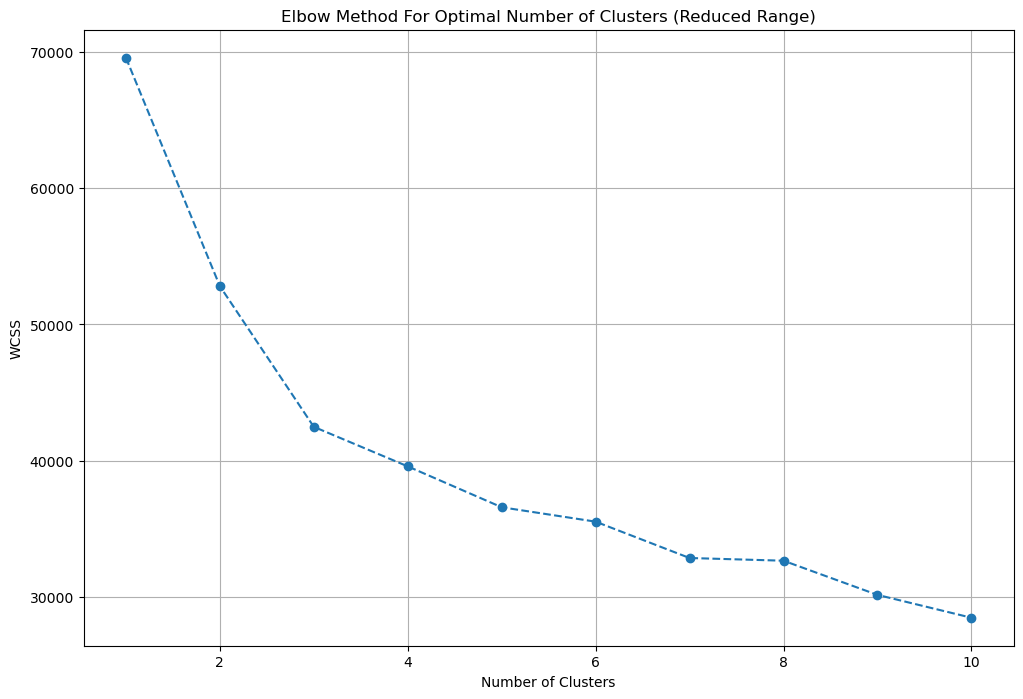

In [52]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [53]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [54]:
df = df.iloc[:,:-18]

In [55]:
df['furnishing_type'] = cluster_assignments

In [56]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1841,"['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '...",0
3469,"['2 Wardrobe', '3 Fan', '1 Exhaust Fan', '1 Ge...",2
2325,"['4 Fan', '5 Light', 'No AC', 'No Bed', 'No Ch...",0
2637,NaN,0
2753,"['2 Wardrobe', '1 Geyser', '4 Light', '1 AC', ...",0


# 5. Features

In [58]:
df[['society','features']].sample(5)

,society,features
277,shapoorji pallonji joyville gurugram,"['Security / Fire Alarm', 'Feng Shui / Vaastu ..."
3826,independent,NaN
859,spaze privy,"['Power Back-up', 'Lift(s)', 'Swimming Pool', ..."
232,earth copia,"['Intercom Facility', 'Lift(s)', 'Feng Shui / ..."
1796,ansal heights 86,"['Security / Fire Alarm', 'Intercom Facility',..."


In [59]:
import pandas as pd
app_df = pd.read_csv('../../Downloads/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Pa...","{'Bajghera Road': '800 Meter', 'Palam Vihar Ha...",https://www.99acres.com/smartworld-one-dxp-sec...,"{'2 BHK': {'building_type': 'Apartment', 'area...","['Swimming Pool', 'Salon', 'Restaurant', 'Spa'..."
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap Un...","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The N...",https://www.99acres.com/m3m-crown-sector-111-g...,"{'3 BHK': {'building_type': 'Apartment', 'area...","['Bowling Alley', 'Mini Theatre', 'Manicured G..."


In [60]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [61]:
temp_df = df[df['features'].isnull()]

In [62]:
temp_df.shape

(664, 26)

In [63]:
x = temp_df.merge(app_df, left_on = 'society', right_on = 'PropertyName', how='left')['TopFacilities']

In [64]:
x

0                                                    NaN
1                                                    NaN
2                                                    NaN
3                                                    NaN
4                                                    NaN
5                                                    NaN
6                                                    NaN
7      ['Swimming Pool', 'Golf Course', 'Card Room', ...
8      ['Swimming Pool', 'Aerobics Centre', 'Barbecue...
9      ['Temple', 'Swimming Pool', 'Bar/Chill-Out Lou...
10                                                   NaN
11     ['Swimming Pool', 'Lounge', 'Aerobics Centre',...
12                                                   NaN
13     ['Mini Theatre', 'Swimming Pool', 'Lounge', 'B...
14                                                   NaN
15                                                   NaN
16                                                   NaN
17                             

In [65]:
df.loc[temp_df.index, 'features'] = x.values

In [66]:
df['features'].isnull().sum()

509

In [67]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [68]:
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

features_binary_df = pd.DataFrame(features_binary_matrix, columns = mlb.classes_)

In [69]:
features_binary_df.head()

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [70]:
features_binary_df.shape

(3865, 130)

In [71]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)
    

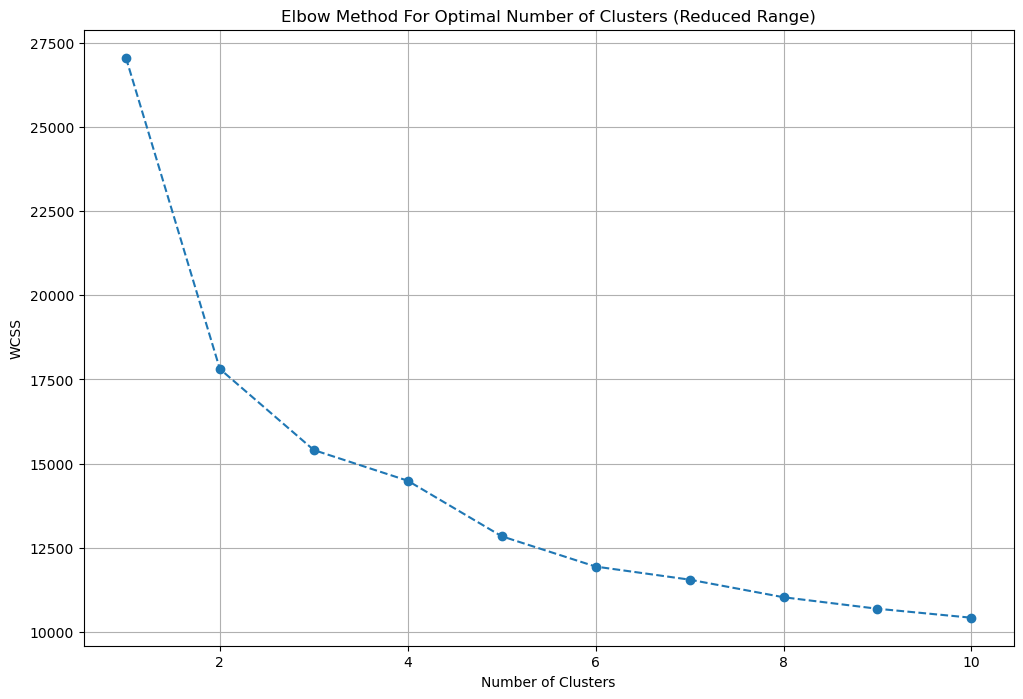

In [72]:
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [73]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}

In [74]:
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)

In [75]:
df['luxury_score'] = luxury_score

In [76]:
df.head()

,sector,property_type,society,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,SuperBuiltUpArea,builtUpArea,carpetArea,others,pooja room,servant room,store room,study room,furnishing_type,features_list,luxury_score
0,sector 49,flat,orchid petals,2.45,11887.0,2061.08,Super Built up area 2061(191.47 sq.m.),3.0,3.0,3,study room,0.0,North-East,Relatively New,"['Sapphire Mall', 'Omaxe City Centre', 'BigBaz...",NaN,"['Feng Shui / Vaastu Compliant', 'Security / F...",2061.0,NaN,NaN,0,0,0,0,1,0,"[Feng Shui / Vaastu Compliant, Security / Fire...",49
1,sector 109,house,international city by sobha phase 1,6.10,25103.0,2430.00,Plot area 270(225.75 sq.m.),5.0,6.0,3+,servant room,2.0,NaN,Moderately Old,"['Dwarka sector 21 metro station', 'Pacific D2...",NaN,"['Maintenance Staff', 'Separate entry for serv...",NaN,2430.0,NaN,0,0,1,0,0,0,"[Maintenance Staff, Separate entry for servant...",30
2,sector 1,flat,sonata group housing gh 24,1.65,5892.0,2800.41,Carpet area: 2800 (260.13 sq.m.),4.0,3.0,3,servant room,8.0,NaN,New Property,"['Pooja Clinic', 'Dr. Sahil Clinic', 'Prakash ...",NaN,"['Lift(s)', 'Maintenance Staff', 'Water Storag...",NaN,NaN,2800.0,0,0,1,0,0,0,"[Lift(s), Maintenance Staff, Water Storage, Vi...",20
3,sector 7,house,independent,0.66,12000.0,550.00,Plot area 550(51.1 sq.m.),3.0,1.0,1.0,others,3.0,East,Relatively New,"['Chintapurni Mandir', 'State bank ATM', 'Pear...",[],"['Water Storage', 'Park', 'Visitor Parking']",NaN,550.0,NaN,1,0,0,0,0,0,"[Water Storage, Park, Visitor Parking]",22
4,sector 37d,flat,bptp terra,1.40,7730.0,1811.13,Super Built up area 1811(168.25 sq.m.)Built Up...,3.0,3.0,3,not available,5.0,South-East,Relatively New,"['Airia Mall', 'Dwarka Expressway', 'Golf Cour...","['6 Fan', '5 AC', '1 Chimney', '1 Modular Kitc...","['Centrally Air Conditioned', 'Water purifier'...",1811.0,1711.0,1611.0,0,0,0,0,0,2,"[Centrally Air Conditioned, Water purifier, Se...",149


In [77]:
df.drop(columns = ['nearbyLocations', 'furnishDetails', 'features', 'features_list', 'additionalRoom'], inplace=True)

In [78]:
df.shape

(3865, 23)

In [79]:
df.to_csv('gurgaon_properties_cleaned_v2.csv', index=False)